In [1]:
# X Manifold Learning

# Während PCA für viele unterschiedliche Bereiche gut einsetzbar ist, performt sie nicht so gut mit nicht-linearen Daten
# >> Die Lösung dieses Problems ist eine Klasse von Anwendungen, die unter den Begriff manifold Learnign gefasst werden können

# Manifold Learning
# ... ist unsupervized Lernmethode, die versucht einen Datensatz als low-dimensional manifolds of high-dimensional spaces
#     zu beschreiben
# ... Exkurs manifolds: Um Manifolds zu verstehen, kann man sich beispielsweise ein Blatt Papier vorstellen.
#     Dies stellt ein 2D Manifold (kann genickt, gerollt werden etc.) in einem 3D-Raum dar
#     - Das Drehen oder Neuausrichten des Papiers im 3D Raum verändert die flache Geometrie nicht > es ist linear im Raum embedded
#     - Beim Zusammenrollen oder Zerknüllen des Papiers haben wir immer noch ein 2D Objekt, das jetzt nicht-linear im 3D Raum embedded ist
#  >> Manifold learning würde nun versuchen die 2Dimensionale Struktur des Papiers zu lernen, obwohl es im 3D-Raum verzerrt ist

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np


(-0.1089571412684307,
 4.1303023353895725,
 0.0447585776140384,
 0.9990273515924064)

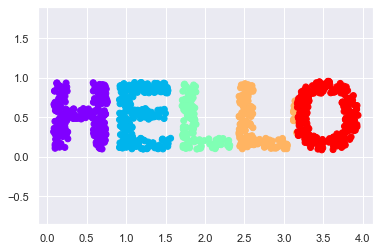

In [2]:
# Erstellen von zweidimensionalen Daten, die als Manifold verstanden werden können

def make_hello(N=1000, rseed=42):
    # Erstelle einen Plot mit "Hello"-Text und speicher diesen als Bild
    fig, ax = plt.subplots(figsize=(4,1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis("off")
    ax.text(0.5, 0.4, "HELLO", va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # png öffnen und zufällige Punkte davon ziehen
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] /data.shape[1])
    X = X[:N]
    
    return X[np.argsort(X[:,0])]

X = make_hello(1000)
colorize = dict(c=X[:,0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:,0], X[:,1], **colorize)
plt.axis('equal')

# Der Output ist zweidimensional und besteht aus Punkten, die das Wort HELLO formen
# >> hilft beim Verständnis der Vorgehensweise der Algorithmen



(1000, 1000)
True


C:\Users\Manue\AppData\Local\Temp\ipykernel_39716\2478596532.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


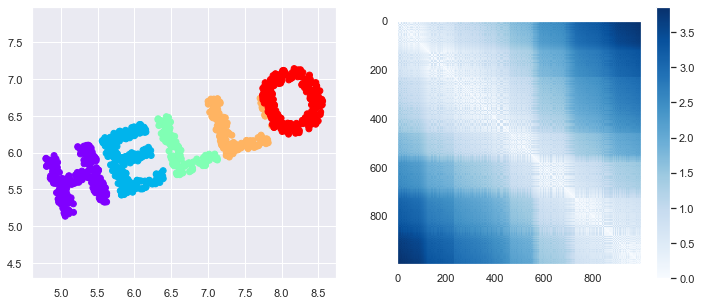

In [3]:
# X Multidimensional Scaling
# Aus der Visualisierung oben wird deutlich, dass die x und y Werte der Datenpunkte alleine nicht relevant sind, man könnte
# die Werte runter- oder hochskalieren oder drehen und das "Hello" wäre immernoch deutlich erkennbar

# Beispiel Rotation
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
        [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

X2 = rotate(X, 20) +5

fig = plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.scatter(X2[:,0], X2[:,1], **colorize)
plt.axis('equal')

# Nun hat jeder Punkt andere Koordinaten, aber die Beziehung (das Manifold "Hello") ist noch immer gut erkennbar
# >> Nicht die einzelnen Koordianten, sondern die Distanz von jedem Punkt zu den anderen ist für den Zusammenhang relevant
#    Diese Distanz kann ebenfalls in einer distance-matrix repräsentiert werde

from sklearn.metrics import pairwise_distances
D = pairwise_distances(X) # Erstellt die Distance Matrix
print(D.shape) # 1000 Punkte mit 1000 Abständen zu jedem anderen Punkt

plt.subplot(1, 2, 2)
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar()
# Die Visualisierung zeigt, helle Bereiche mit wenig Distanz, dunkle Bereiche, größere Distanz
# >> E.g. oben links Punkt NUll ist sehr nach bei Punkten in der Umgebung und z.B. weit entfernt von Punkt 1000

# (Warning Ergebnis)
# MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. plt.colorbar()

# Distanz-Matrix für rotiertes Hello
D2 = pairwise_distances(X2)
print(np.allclose(D, D2)) # Zeigt, dass beide Matrixe genau gleich sind

(-1.0291497799483846,
 1.0278567681719448,
 -2.0494894050096297,
 2.1202816440434114)

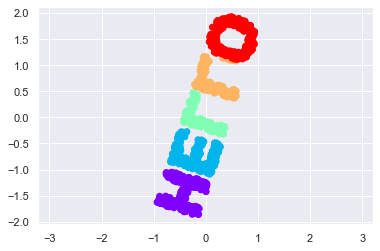

In [4]:
# Der Multidimensional Scaling Algorithmus
# Während die Distanzmatrix ein Datenformat darstellt, dass bei jeder Veränderung von "HELLO" im 2D-Raum erhalten bleibt,
# ist es schwierig, diese zurück in die ursprüngliche Beziehung zu transformieren (das Hello)
# >> Ziel des Multidimensional Scaling Algorithmus
#    Aus einer Distanzmatrix versucht dieser eine D-Dimensionale Repräsentation der Daten (ein 'Objekt') zu generieren

from sklearn.manifold import MDS
# Modell-Objekt erstellen
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
# Modell fitten und Daten transformieren
out = model.fit_transform(D)
plt.scatter(out[:,0], out[:,1], **colorize)
plt.axis('equal')

# Der Algorithmus gewinnt eine der möglichen 2D-Koordinaten für die Repräsentation der Beziehung zwischen den Punkten

(1000, 3)


(-1.029149779948389, 1.0278567681719477, -2.04948940500963, 2.12028164404341)

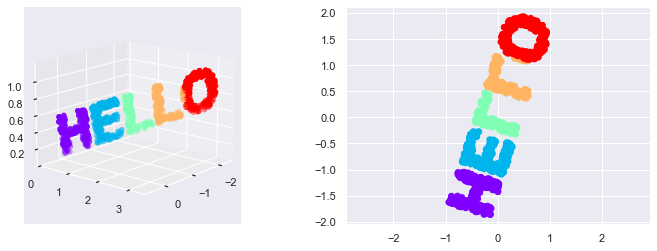

In [5]:
# MDS as Manifold Learning
# Der Nutzen davon wird klarer, wenn berücksichtigt wrid, dass eine Distanzmatrix für jede Dimension berechnet werden kann

# z.B. Projektion des "HELLO" in einen 3D-Raum

# ... seltsame Formel zum umwandeln von 2D Daten in 3D Daten
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])

X3 = random_projection(X, 3)
print(X3.shape) # jeder Punkt hat nun drei Koordinaten

fig = plt.figure(figsize=(12, 4))
plt.subplot(1,2,1, projection='3d')
from mpl_toolkits import mplot3d

plt.subplot(1,2,1).scatter3D(X3[:,0], X3[:,1], X3[:,2], **colorize)
plt.subplot(1,2,1).view_init(azim=40, elev=15)

# MDS aus 3D-Distanzmatrix
# Rückberechnung der Koordination aus der 3D Matrix + Visualisierung
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)

plt.subplot(1,2,2)
plt.scatter(out3[:,0], out3[:,1], **colorize)
plt.axis('equal')

KeyboardInterrupt: 

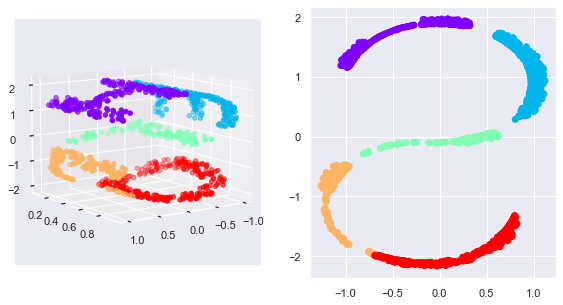

In [6]:
# X Nicht-Lineare Embeddings
# MDS funktioniert nur bei linearen Embedding (Rotationen, Skalierung in höhrere Dimension etc.)
# Bei nicht-linearen Embeddings, wie rollen oder zerknüllen, funktioniert Mutlidimensional Scaling nicht mehr

# e.g. Hello in eine S-Kurve aufrollen

# Seltsame Funktion zum aufrollen der Daten
def make_hello_s_curve(X):
    t = (X[:, 0]-2)*0.75 *np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) -1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

# Visualisieren der Daten
fig = plt.figure(figsize=(15, 5))
plt.subplot(1,3,1, projection='3d')

plt.subplot(1,3,1).scatter3D(XS[:,0], XS[:,1], XS[:,2],
            **colorize)
plt.subplot(1,3,1).view_init(azim=55, elev=10) # Zeigt, dass die Daten nun in einer S-Curve angeordnet sind

# Extraxtion der Koordinaten mit einem einfachen MDS-Algorithmus
# Modell-Objekt erstellen

model = MDS(n_components=2, random_state=2) # Versuch eine Repräsentation der Daten mit 2D-Koordinaten zu finden
outS = model.fit_transform(XS)

plt.subplot(1,3,2)
plt.scatter(outS[:,0], outS[:,1], **colorize)
# Bei der zweidimensionalen-Repräsentation wird die S-Kruve nicht aufgerollt, sondern lediglich die Form, das "S" reproduziert


# Selbsttest
model = MDS(n_components=3, random_state=2) # Versuch eine Repräsentation der Daten mit 3D-Koordinaten zu finden
outS3 = model.fit_transform(XS)

plt.subplot(1,3,3)
plt.scatter(outS3[:,0], outS3[:,1], **colorize)
# >> Plot erhält die Form mit 3 Komponenten etwas besser 
# >> Selbsttest zeigt, dass eine visualisierung im 3D-Raum jedoch nicht das gewünschte Ergebnis bringt

(0.15, -0.15)

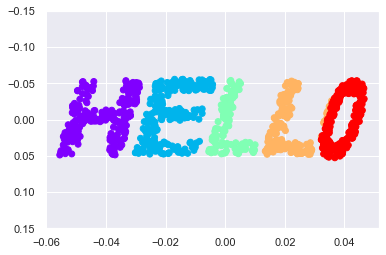

In [136]:
# X Locally Linear Embeddings: von nicht-linearen Manifolds

# Das Problem ist, dass der einfache MSD Algorithmus versucht die Distanz zwischen weitentfernten Punkten in 
# der Repräsentation zu erhalten (siehe Bild im Buch...)

# Wenn man jedoch stattdessen den Algorithmus so einstellt, dass er nur die Distanz von Punkten in der Nähe erhält, 
# wird die Repräsentation deutlich besser >> Bei dieser Methode spricht man von Locally Linear Embeddings
# ... LLE berücksichtigt nur die Distanz der Punkte zu nahen Nachbarn (e.g. die 100 Punkte mit der geringsten Distanz)
# ... Um diese Logik umzusetzen, implementiert der LLE Algorithmus eine Kostenfunktion
# ... LLE kommt in vielen unterschiedlichen Anwendungsbereichen

from sklearn.manifold import LocallyLinearEmbedding
# Modell-Objekt instanziieren
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                              eigen_solver='dense')

# Modell berechnen und Daten transformieren
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:,0], out[:,1], **colorize)
ax.set_ylim(0.15, -0.15)


In [ ]:
# Zusammenfassung
# Auch wenn die Funktionsweise und Beispiele hier ziemlich beeindrucken sind, wird manifold Learning in der Praxis selten
# verwendet. Folgende Herausforderungen, lassen den Algorithmus vor PCA schwach aussehen:
# ... kein gutes Framework, um mit fehlenden Daten umzugehen (stattdessen Iterative Ansätze in PCA)
# ... Noise kann einen Starken Einfluss auf das Embedding haben (PCA filtert noise)
# ... das Resultat hängt streng von der gewählten Anzahl der Nachbarn ab, die berücksichtigt werden + diese Zahl kann
#     nicht quantativ bestimmt werden
# ... die optimale Anzahl an Output-Dimensionen kann schwer festgelegt werden (PCA legt diese über die Eigenwerte fest)
# ... Die Bedeutung von Embeddings ist nicht immer logisch erschließbar/interpretiertbar (Bei PCA jedoch schon)
# ... Die benötigte Rechenleistung skaliert enorm mit steigender Fallzahl


# Der einzige klare Vorteil von manifold Methoden über die PCA ist die Möglichkeit nicht-lineare Zusammenhänge der Daten
# zu erhalten >> Deswegen ist es oft sinnvoll, MDS für eine qualitative Exploration nach einer PCA anzuwenden

# Scikit-LEarn hat viele Algorithmen für manifold learning (see website under manifold)
# >> Empfehlungen aus dem Buch:
# .. Für einfache Probleme, wie die S-Kruve LLE + Variationen (besonders modified LLE)
# .. Für hoch-dimensionale aus Real Life Daten, isometric mapping (Isomap) oft besser als LLE
# .. Für highly clustered Data ist die t-distributed stochastic neighbor embedding (t-SNE) am besten, jedoch sehr langsam


(2370, 2914)


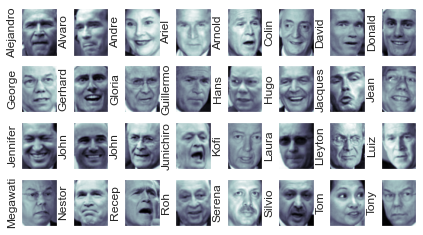

In [7]:
# Anwendungsbeispiel I: Isomap on Faces
# Ein Anwendungsfall, in dem Manifold learning häufiger verwendet wird, ist um den Zusammenhang zwischen hochdimensionalen
# Daten besser zu verstehen (e.g. Bildaten mit vielen Pixeln: 1000 Pixel = jedes Bild entspricht einer Sammlung von Punkten 
# in 1000 Dimensionen).

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
print(faces.data.shape) # 2370 Bilder mit 2914 Pixeln

# Visualisierung der Bilder
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(left=0.01, right=0.95, wspace=0.1)

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set_ylabel(faces.target_names[i].split()[0])
    
# Ziel ist es nun ein low-dimensional embedding der hoch-dimensionalen Daten zu berechnen, um die fundamentale Beziehung 
# zwischen den Bildern zu bestimmen

88


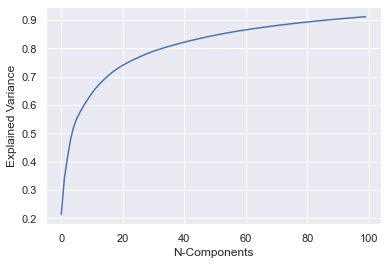

In [8]:
# a) ein guter Anfang ist eine PCA, um zu bestimmen, bei wie vielen Dimensionen ein Großteil der Varianz erhalten bleibt
from sklearn.decomposition import PCA

model = PCA(100, svd_solver='randomized').fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel("N-Components")
plt.ylabel("Explained Variance")

print(sum(np.cumsum(model.explained_variance_ratio_) < .9)) # ab 89 Komponente wird eine Varianz von 90% erhalten

# Wenn Daten, wie sich hier zeigt, nach der PCA immernoch durch eine hohe Anzahl von Dimensionen bestimmt werden
# ist es manchmal sinnvoll eine Isomap anzuwenden

In [9]:
# b) Berechnen der Isomap
from sklearn.manifold import Isomap
# Modell-Objekt instantziieren
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
print(proj.shape)

# >> Das Ergebnis beschreibt die Daten nun auf zwei Dimensionen

(2370, 2)


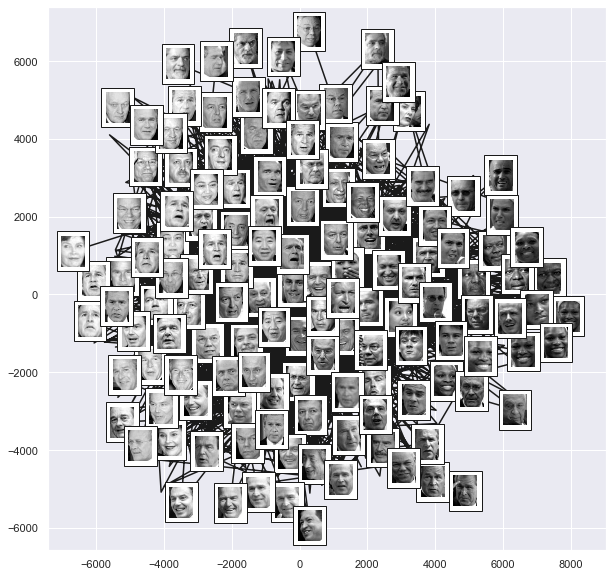

In [18]:
# c) Visualisieren der Image-Thumbnails 
# ... in den zwei Dimensionen des manifold-Learning, um die Beziehung zwischen den Daten besser zu verstehen


from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                   thumb_frac=0.05, cmap='gray'):
    ax= ax or plt.gca()
    
    # Nachfolgend wird das Modell erstellt und die Werte der beiden Dimensionen geplottet
    proj = model.fit_transform(data)
    ax.plot(proj[:,0], proj[:, 1], 'k')
    
    # Erstellt ein Bild mit einem gewissen Format
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) **2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i]- shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # dont show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                         proj[i])
            ax.add_artist(imagebox)

fig, ax = plt.subplots(figsize=(10,10))

# Erstellen der Graphik
plot_components(faces.data,
               model=Isomap(n_components=2),
               images=faces.images[:, ::2, ::2])

# Das Erbnis zeigt, dass die overall Darkness des Bildes von rechts nach links geplottet werden
# Sowie die Rotation des Gesichts von unten nach oben
# >> Diese Daten könnten als Features für einen Classifizierungsalgorithmus verwendet werden...

In [70]:
# Anwendungsbeispiel 2: Visualisierung von Strukturen in Zahlen
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", as_frame=False)
print("Braucht sehr lange")

Braucht sehr lange


(70000, 784)


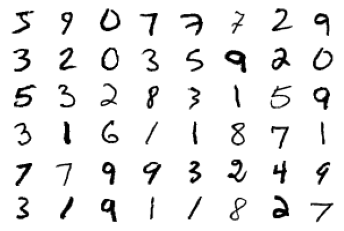

In [65]:
print(mnist.data.shape)

fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r')

In [73]:
# Berechnen des Manifold Learning Modells

# Dabei wird nur 1/30tel des Datensatzes verwendet, da der volle Datensatz seeeehr lange braucht
print("start")
data = mnist.data[::30]
target = mnist.target[::30]
print(data.shape)

model = Isomap(n_components=2)
proj = model.fit_transform(data)
print("Modell berechnet")

start
(2334, 784)
Modell berechnet


C:\Users\Manue\AppData\Local\Temp\ipykernel_39716\2120194245.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=range(10))


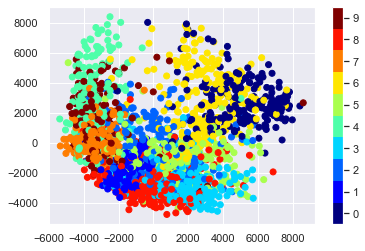

In [81]:
# Visualisierung der zweidimensionalen Lösung
target = [int(value) for value in target]

plt.scatter(proj[:,0], proj[:,1], c=target, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

(1970, 784)


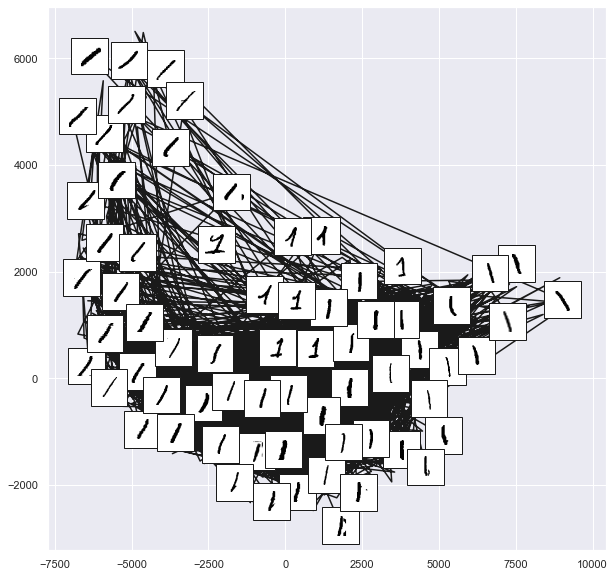

In [83]:
# Hilfreicher, wenn nur eine Zahl visualisiert wird

# Wählt 1/4 der Bilder mit einer 1 aus
data = mnist.data[mnist.target == '1'][::4]
print(data.shape)

fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape(-1, 28, 28), ax=ax, thumb_frac=0.05, cmap='gray_r')

# Hilft zu verstehen, welche Arten von Einsern im Datensatz vorhanden sind
# X - Achse beschreibt die Schräge
# Y - Achse beschreibt vorhanden sein von Schräge + Basis

(1824, 784)


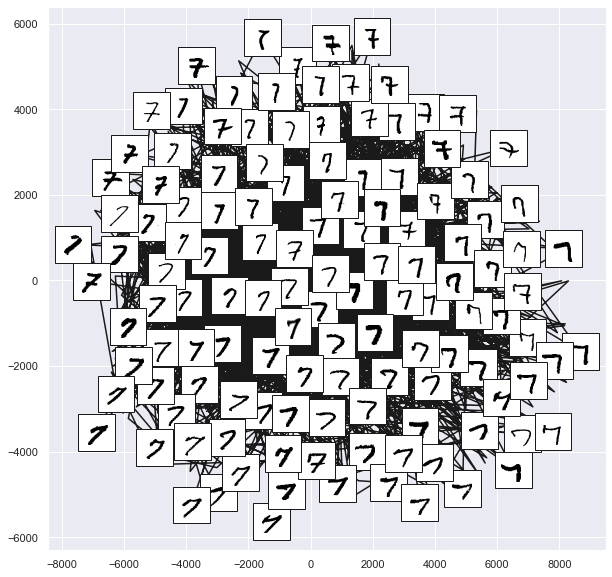

In [93]:
# Hilfreicher, wenn nur eine Zahl visualisiert wird

# Wählt 1/4 der Bilder mit einer 7 aus
data = mnist.data[mnist.target == '7'][::4]
print(data.shape)

fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape(-1, 28, 28), ax=ax, thumb_frac=0.05, cmap='gray_r')